In [170]:
import pandas as pd 
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'notebook')
from math import sqrt
import seaborn as sns 
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree   
from six import StringIO 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
import pandas as pd
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import csv
from decimal import Decimal, ROUND_HALF_UP
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [171]:
data = pd.read_csv('patient.csv')
data

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,...,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date,deaths
0,2,1,97,2,42,97,2,2,1,2,...,2,2,2,2,2,99,1,97,9999-99-99,0
1,1,1,97,2,51,2,2,2,2,2,...,2,2,2,2,2,99,1,97,9999-99-99,0
2,2,2,2,2,51,97,1,2,2,2,...,2,2,1,2,2,99,1,2,9999-99-99,0
3,2,2,2,2,57,97,1,2,2,2,...,2,2,2,2,2,99,1,2,2020-04-01,1
4,1,2,2,2,44,2,1,2,2,2,...,2,2,2,2,2,2,2,2,9999-99-99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95834,2,2,2,2,59,97,2,2,2,2,...,2,2,2,2,2,99,3,2,9999-99-99,0
95835,2,2,2,2,50,97,1,2,2,1,...,2,2,2,1,2,99,3,2,9999-99-99,0
95836,1,2,2,2,65,2,2,2,2,2,...,2,2,2,2,2,99,3,2,9999-99-99,0
95837,1,1,97,2,48,2,2,2,2,2,...,2,2,2,2,2,1,3,97,9999-99-99,0


In [172]:
data.corr()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,deaths
sex,1.000000,0.104142,-0.104231,-0.041587,0.036508,0.995064,0.015488,0.017833,0.017779,0.014783,0.016326,0.019640,0.015451,0.016856,0.015694,0.011192,-0.016174,-0.045686,-0.104268,0.052972
patient_type,0.104142,1.000000,-0.999327,-0.263222,0.277913,0.103534,0.012617,0.020348,0.026499,0.025789,0.011135,0.039194,0.024838,0.022876,0.022190,0.024992,0.183498,-0.087532,-0.999299,0.282048
intubated,-0.104231,-0.999327,1.000000,0.263512,-0.278253,-0.103628,-0.012775,-0.020500,-0.026657,-0.025573,-0.011283,-0.039362,-0.024987,-0.023029,-0.022344,-0.025147,-0.183582,0.087906,0.999966,-0.282923
pneumonia,-0.041587,-0.263222,0.263512,1.000000,-0.103844,-0.041455,-0.001884,-0.004933,-0.007060,-0.007793,-0.001364,-0.014695,-0.007436,-0.005875,-0.005447,-0.006953,-0.033221,0.033883,0.263465,-0.108989
age,0.036508,0.277913,-0.278253,-0.103844,1.000000,0.035711,0.006527,0.019210,0.024390,0.023457,-0.002451,0.025646,0.021370,0.017958,0.024006,0.022067,0.046247,-0.072277,-0.278264,0.185163
pregnant,0.995064,0.103534,-0.103628,-0.041455,0.035711,1.000000,0.027024,0.030218,0.030095,0.026829,0.028412,0.029823,0.027337,0.028823,0.027718,0.022950,-0.015163,-0.047578,-0.103665,0.052960
diabetes,0.015488,0.012617,-0.012775,-0.001884,0.006527,0.027024,1.000000,0.869776,0.881200,0.858777,0.876861,0.749238,0.866721,0.809533,0.862719,0.837194,0.026889,-0.030232,-0.012740,0.006402
copd,0.017833,0.020348,-0.020500,-0.004933,0.019210,0.030218,0.869776,1.000000,0.918751,0.910085,0.893289,0.783647,0.903781,0.843663,0.900077,0.871733,0.032278,-0.036061,-0.020460,0.012222
asthma,0.017779,0.026499,-0.026657,-0.007060,0.024390,0.030095,0.881200,0.918751,1.000000,0.918711,0.897319,0.791514,0.912634,0.848370,0.914133,0.886042,0.034112,-0.037689,-0.026633,0.014577
immunosuppression,0.014783,0.025789,-0.025573,-0.007793,0.023457,0.026829,0.858777,0.910085,0.918711,1.000000,0.891359,0.791973,0.906272,0.848535,0.903133,0.877877,0.033583,-0.033387,-0.025190,0.017316


<IPython.core.display.Javascript object>


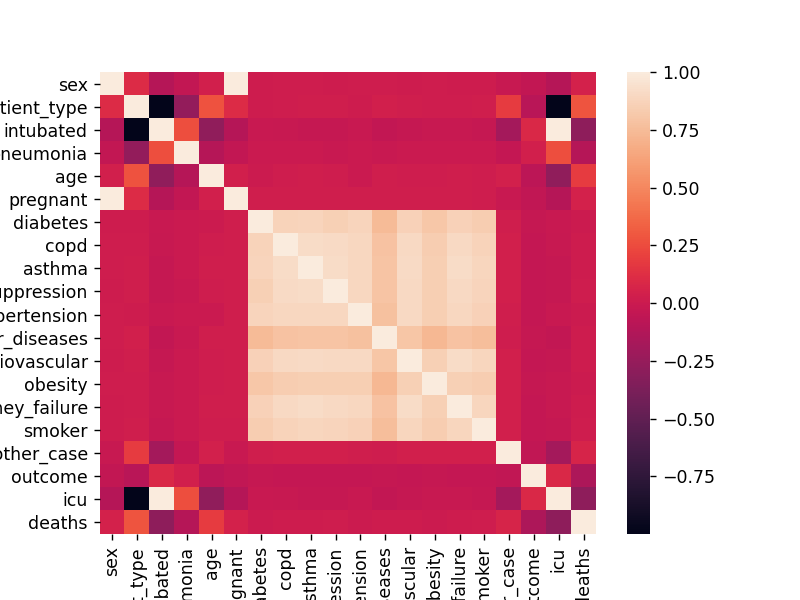

In [175]:
sns.heatmap(data.corr())

In [176]:
plt.close()

In [177]:
data.corr().nlargest(11,'deaths').index

Index(['deaths', 'patient_type', 'age', 'another_case', 'sex', 'pregnant',
       'smoker', 'immunosuppression', 'cardiovascular', 'other_diseases',
       'asthma'],
      dtype='object')

In [179]:
data.duplicated().sum()

62461

In [180]:
data1 = data.drop_duplicates()

In [181]:
data1.duplicated().sum()

0

<IPython.core.display.Javascript object>


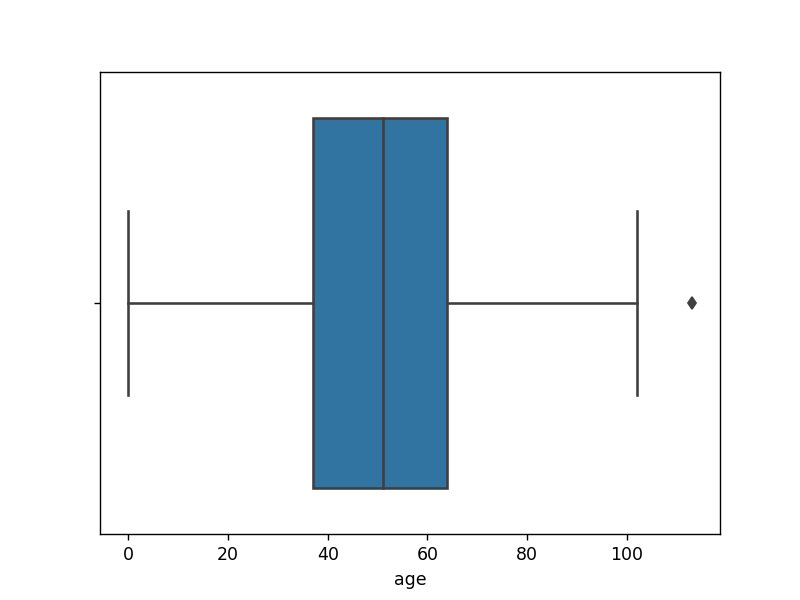

In [184]:
sns.boxplot(x=data1['age'])

In [185]:
plt.close()

In [186]:
data1 = data1.drop(data1.index[data1[('age')]>= 110])

<IPython.core.display.Javascript object>


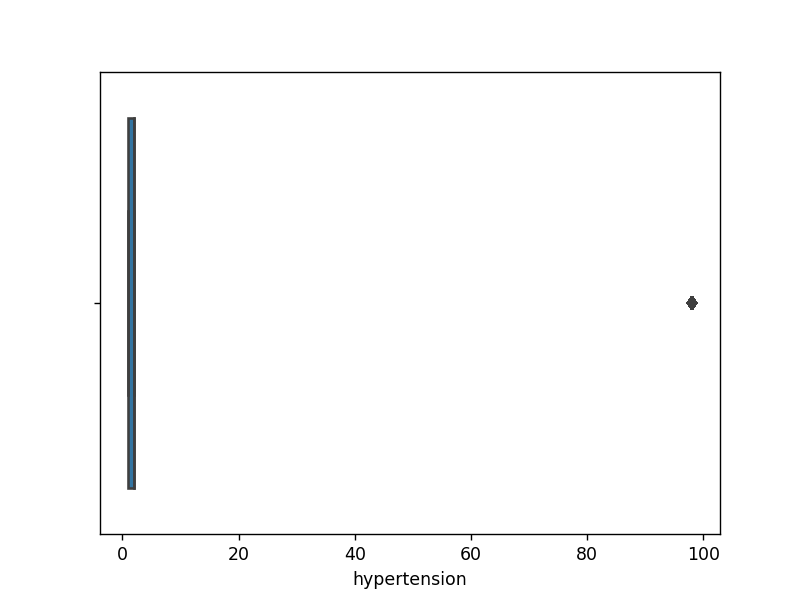

In [187]:
sns.boxplot(x=data1['hypertension'])

In [188]:
plt.close()

In [189]:
data1 = data1.drop(data1.index[data1[('hypertension')]>= 10])

<IPython.core.display.Javascript object>


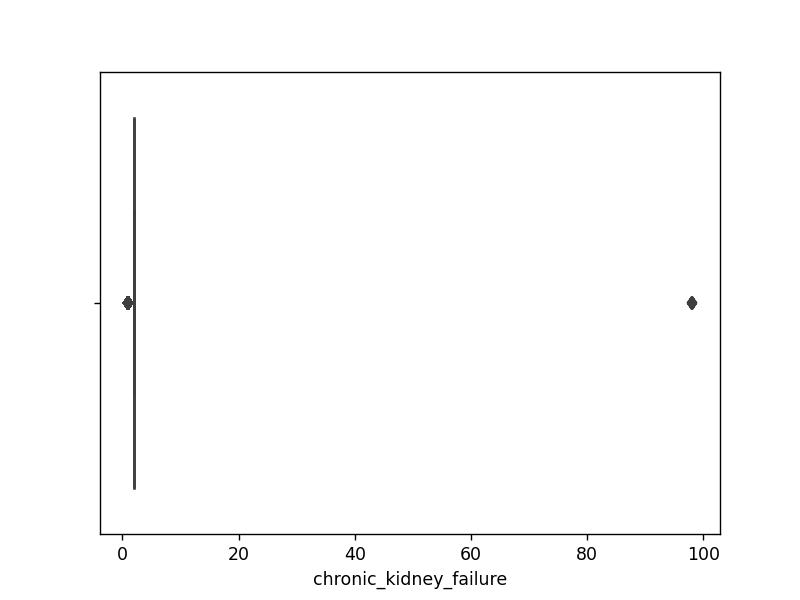

In [190]:
sns.boxplot(x=data1['chronic_kidney_failure'])

In [191]:
plt.close()

In [192]:
data1 = data1.drop(data1.index[data1[('chronic_kidney_failure')]>= 10])

<IPython.core.display.Javascript object>


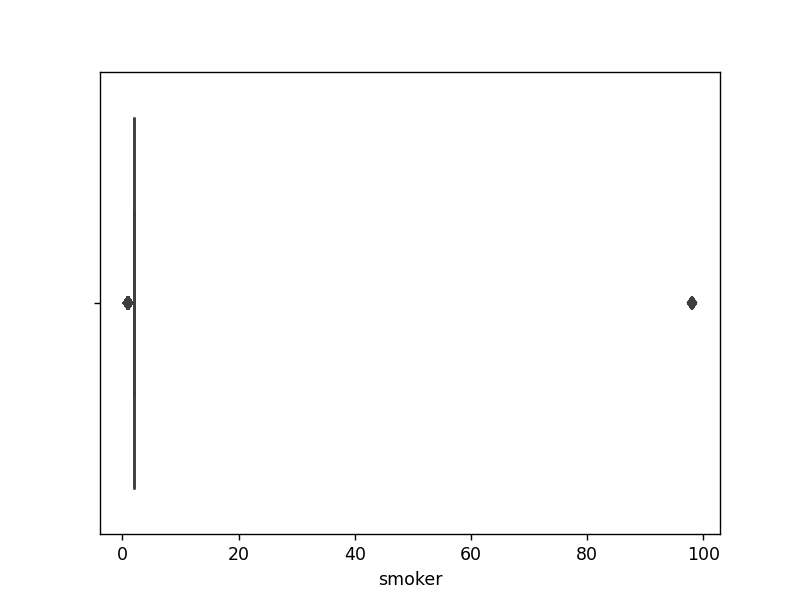

In [193]:
sns.boxplot(x=data1['smoker'])

In [194]:
plt.close()

In [195]:
data1 = data1.drop(data1.index[data1[('smoker')]>= 10])

<IPython.core.display.Javascript object>


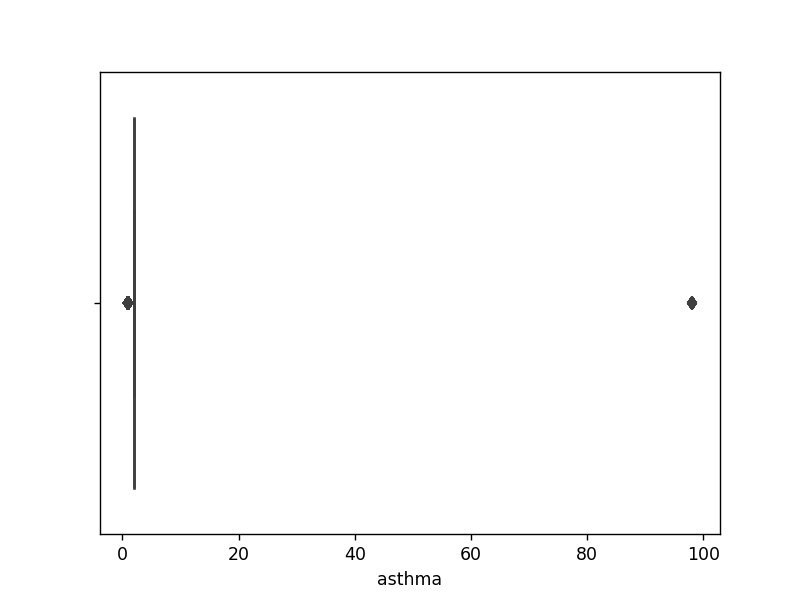

In [196]:
sns.boxplot(x=data1['asthma'])

In [197]:
plt.close()

<IPython.core.display.Javascript object>


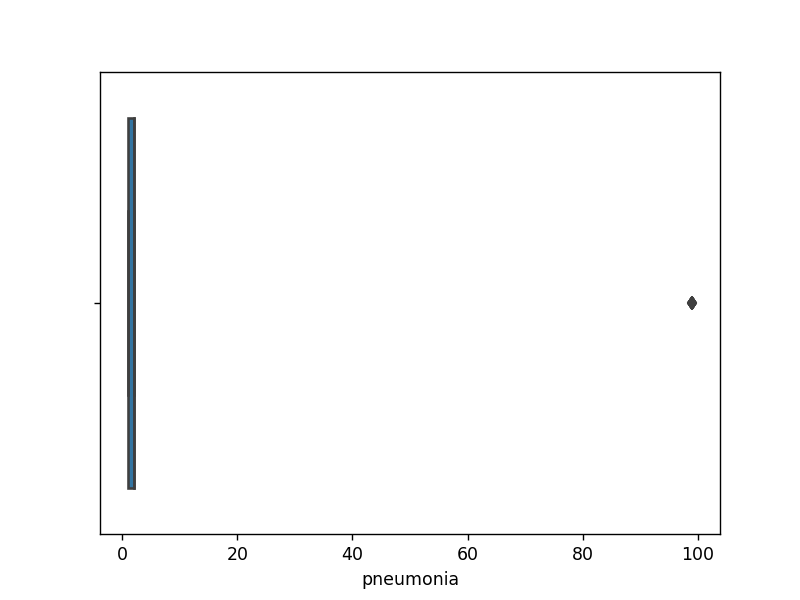

In [198]:
sns.boxplot(x=data1['pneumonia'])

In [199]:
plt.close()

In [200]:
data1 = data1.drop(data1.index[data1[('asthma')]>= 10])

In [201]:
data1 = data1.drop(data1.index[data1[('cardiovascular')]>= 10])

In [202]:
data1 = data1.drop(data1.index[data1[('diabetes')]>= 10])

In [203]:
data1 = data1.drop(data1.index[data1[('pneumonia')]>= 10])

In [204]:
#y = data1['deaths']
#X = data1[[ 'patient_type', 'age', 'another_case', 'sex', 'pregnant',
 #      'smoker', 'immunosuppression', 'cardiovascular', 'other_diseases','asthma']]


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
y = data1['deaths']
X = data1[[ 'obesity', 'age', 'hypertension', 'sex', 'chronic_kidney_failure',
      'smoker', 'asthma', 'cardiovascular', 'diabetes','pneumonia']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
#y = data1['deaths']
#X = data1[[ 'sex','patient_type','intubated','pneumonia','age','pregnant','diabetes','copd',
     #      'asthma','immunosuppression','hypertension','other_diseases','cardiovascular','obesity'
      #     ,'chronic_kidney_failure','smoker','another_case','outcome','icu']]


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>


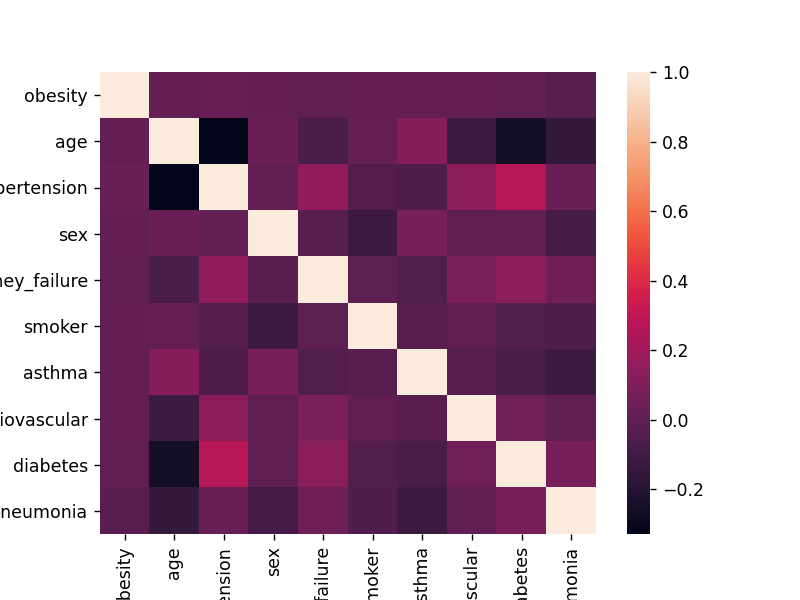

In [208]:
sns.heatmap(X.corr())

In [209]:
plt.close()

In [210]:
tre = tree.DecisionTreeClassifier()
tre = tre.fit(X_train, y_train)
acc_tree = tre.score(X_test , y_test) * 100
acc_tree

88.1234793187348

In [211]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_gnb = gnb.score(X_test , y_test) * 100
acc_gnb


79.57725060827251

In [212]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
nn.fit(X_train, y_train)
acc_nn = nn.score(X_test , y_test) * 100
acc_nn

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


89.96350364963503

In [213]:
svm = svm.SVC()
svm.fit(X_train, y_train)
acc_svm = svm.score(X_test , y_test) * 100 
acc_svm


89.91788321167883

In [214]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc_lr = lr.score(X_test, y_test) * 100
acc_lr


89.91788321167883

In [215]:

acc_svm1 = round(acc_svm,3)
acc_tree1 = round(acc_tree,3)
acc_gnb1 = round(acc_gnb,3)
acc_nn1 = round(acc_nn,3)
acc_lr1 = round(acc_lr,3)
print(acc_svm1)
print(acc_tree1)
print(acc_gnb1)



89.918
88.123
79.577


In [216]:
#predictions for models
predictions_svm = svm.predict(X_test)


predictions_tree = tre.predict(X_test)


predictions_nn = nn.predict(X_test)


predictions_gnb = gnb.predict(X_test)


predictions_lr = lr.predict(X_test)

print(predictions_svm)
print(len(predictions_svm))


[0 0 0 ... 0 0 0]
6576


In [217]:
#Confusion matrix, sensitivity and specificity SVM

cm_svm = confusion_matrix(y_test,predictions_svm)
print('Confusion Matrix SVM : \n', cm_svm)

total1=sum(sum(cm_svm))

sensitivity_svm = cm_svm[0,0]/(cm_svm[0,0]+cm_svm[0,1])
print('Sensitivity SVM : ', sensitivity_svm )

specificity_svm = cm_svm[1,1]/(cm_svm[1,0]+cm_svm[1,1])
print('Specificity SVM : ', specificity_svm)

Confusion Matrix SVM : 
 [[5913    0]
 [ 663    0]]
Sensitivity SVM :  1.0
Specificity SVM :  0.0


In [218]:
#Confusion matrix, sensitivity and specificity Decision Tree

cm_tree = confusion_matrix(y_test,predictions_tree)
print('Confusion Matrix Tree : \n', cm_tree)

total1=sum(sum(cm_tree))

sensitivity_tree = cm_tree[0,0]/(cm_tree[0,0]+cm_tree[0,1])
print('Sensitivity Tree : ', sensitivity_tree )

specificity_tree = cm_tree[1,1]/(cm_tree[1,0]+cm_tree[1,1])
print('Specificity Tree : ', specificity_tree)

Confusion Matrix Tree : 
 [[5763  150]
 [ 631   32]]
Sensitivity Tree :  0.9746321664129883
Specificity Tree :  0.048265460030165915


In [219]:
#Confusion matrix, sensitivity and specificity Neural Networks

cm_nn = confusion_matrix(y_test,predictions_nn)
print('Confusion Matrix Neural Networks : \n', cm_nn)

total1=sum(sum(cm_nn))

sensitivity_nn = cm_nn[0,0]/(cm_nn[0,0]+cm_nn[0,1])
print('Sensitivity NN : ', sensitivity_nn )

specificity_nn = cm_nn[1,1]/(cm_nn[1,0]+cm_nn[1,1])
print('Specificity NN : ', specificity_nn)

Confusion Matrix Neural Networks : 
 [[5913    0]
 [ 660    3]]
Sensitivity NN :  1.0
Specificity NN :  0.004524886877828055


In [220]:
#Confusion matrix, sensitivity and specificity Logistic Regression

cm_lr = confusion_matrix(y_test,predictions_lr)
print('Confusion Matrix LR : \n', cm_lr)

total_lr=sum(sum(cm_lr))

sensitivity_lr = cm_lr[0,0]/(cm_lr[0,0]+cm_lr[0,1])
print('Sensitivity LR : ', sensitivity_lr )

specificity_lr = cm_tree[1,1]/(cm_lr[1,0]+cm_lr[1,1])
print('Specificity LR : ', specificity_lr)

Confusion Matrix LR : 
 [[5913    0]
 [ 663    0]]
Sensitivity LR :  1.0
Specificity LR :  0.048265460030165915


In [221]:
#Confusion matrix, sensitivity and specificity GNB

cm_gnb = confusion_matrix(y_test,predictions_gnb)
print('Confusion Matrix GNB : \n', cm_gnb)

total_gnb=sum(sum(cm_gnb))

sensitivity_gnb = cm_gnb[0,0]/(cm_gnb[0,0]+cm_gnb[0,1])
print('Sensitivity gnb : ', sensitivity_gnb )

specificity_gnb = cm_gnb[1,1]/(cm_gnb[1,0]+cm_gnb[1,1])
print('Specificity gnb : ', specificity_gnb)

Confusion Matrix GNB : 
 [[4955  958]
 [ 385  278]]
Sensitivity gnb :  0.8379841028242855
Specificity gnb :  0.4193061840120664


In [222]:
# Plotting Accuracy, Sensitivity and Specificity
accuracy = [acc_svm1, acc_tree1, acc_gnb1, acc_nn1, acc_lr1]
sensitivity = [100*round(sensitivity_svm,2), 100*round(sensitivity_tree,2), 100*round(sensitivity_gnb,2), 100*round(sensitivity_nn,2), 100*round(sensitivity_lr,2)]
specificity = [100*round(specificity_svm,2), 100*round(specificity_tree,2), 100*round(specificity_gnb,2), 100*round(specificity_nn,2), 100*round(specificity_lr,2)]
names = ["SVM","Decision Tree", "Naive Bayes", "Neural N", "Logistic R"]



<IPython.core.display.Javascript object>


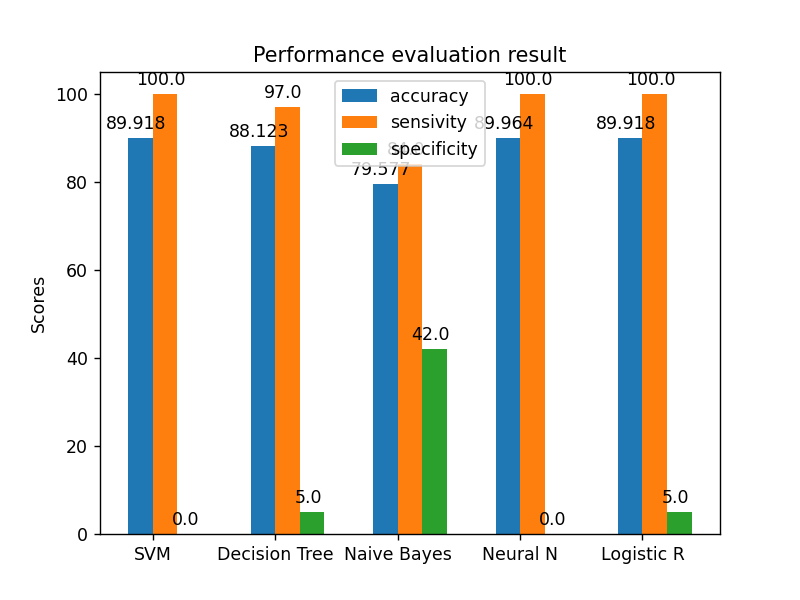

In [223]:





x = np.arange(len(names))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, sensitivity, width, label='sensivity')
rects3 = ax.bar(x + width/0.66, specificity, width, label='specificity')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance evaluation result')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)



plt.show()

In [224]:
plt.close()

<IPython.core.display.Javascript object>


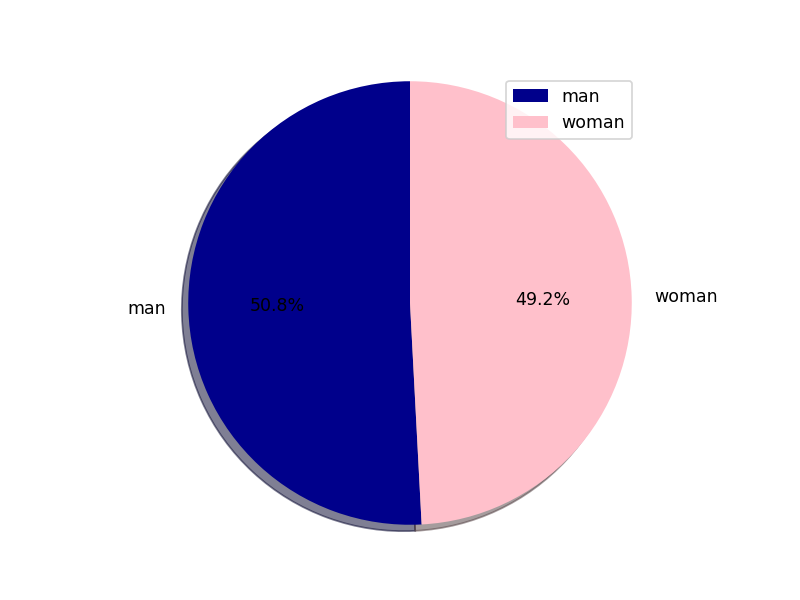

In [225]:
# Plotting Gender
man = []
woman = []
sex = np.array(data["sex"])
for a in range(95839):
    if sex[a] == 1:
        woman.append("1")
    else:
        man.append("2")

list_lenght1 = len(man)
list_lenght2 =len(woman)

# defining labels
activities = ['man', 'woman']

# portion covered by each label
slices = [list_lenght1, list_lenght2]

# color for each label
colors = ['darkblue', 'pink']

# plotting the pie chart
plt.pie(slices, labels=activities, colors=colors,
        startangle=90, shadow=True, explode=(0, 0),
        radius=1.2, autopct='%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()

In [226]:
plt.close()

<IPython.core.display.Javascript object>


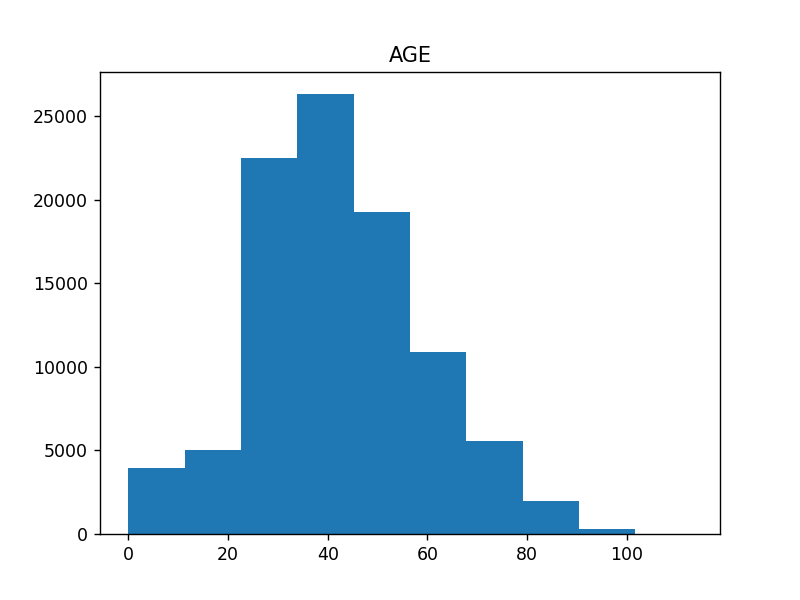

In [227]:
# Plotting Age
age = np.array(data["age"])
plt.hist(age, bins = 10)
plt.title('AGE')
plt.show()

In [228]:
plt.close()

<IPython.core.display.Javascript object>


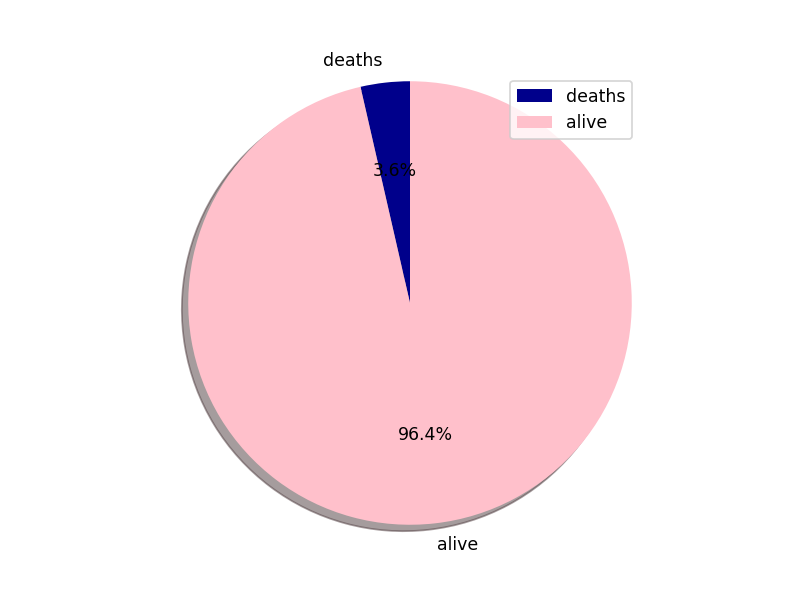

In [229]:
# Plotting Result
ded = []
ali = []
patients = np.array(data["deaths"])

for a in range(95839):
    if patients[a] == 1:
        ded.append("1")
    else:
        ali.append("0")

list_lenght11 = len(ded)
list_lenght22 =len(ali)

# defining labels
activities = ['deaths', 'alive']

# portion covered by each label
slices = [list_lenght11, list_lenght22]

# color for each label
colors = ['darkblue', 'pink']

# plotting the pie chart
plt.pie(slices, labels=activities, colors=colors,
        startangle=90, shadow=True, explode=(0, 0),
        radius=1.2, autopct='%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()

In [230]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions_tree.tolist()}).head(50)
pred.head(50)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
